# Neural Network (ANN)

This script prepares the data for modelling and can be used to the neural network.

In [1]:
import numpy as np
import pandas as pd
import datetime
import os
import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras import optimizers
from sklearn.metrics import mean_squared_error, r2_score
import random
from numpy.random import seed

In [2]:
# set variables from config file
config_path = os.path.abspath('..')

with open(config_path + '/config-example.json', 'r') as f:
    config = json.load(f)

processing_path = config['DEFAULT']['processing_path']
epc_train_clean_fname = config['DEFAULT']['epc_train_clean_fname']
epc_test_clean_fname = config['DEFAULT']['epc_test_clean_fname']
epc_train_dd_fname = config['DEFAULT']['epc_train_dd_fname']
epc_test_dd_fname = config['DEFAULT']['epc_test_dd_fname']
epc_fname_suffix = config['DEFAULT']['epc_fname_suffix']

In [3]:
epc_train = pd.read_csv(os.path.join(processing_path,epc_train_dd_fname) + epc_fname_suffix,header = 0,delimiter = ',')
epc_test = pd.read_csv(os.path.join(processing_path,epc_test_dd_fname) + epc_fname_suffix,header = 0,delimiter = ',')

C:\Users\KingRemy\AppData\Local\Temp\ipykernel_14080\1524384065.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  epc_train = pd.read_csv(os.path.join(processing_path,epc_train_dd_fname) + epc_fname_suffix,header = 0,delimiter = ',')
C:\Users\KingRemy\AppData\Local\Temp\ipykernel_14080\1524384065.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  epc_test = pd.read_csv(os.path.join(processing_path,epc_test_dd_fname) + epc_fname_suffix,header = 0,delimiter = ',')


In [4]:
epc_train.drop(['BUILDING_REFERENCE_NUMBER','COUNTY','inspection_year'],axis=1,inplace=True)
epc_test.drop(['BUILDING_REFERENCE_NUMBER','COUNTY'],axis=1,inplace=True)

In [5]:
epc_train.head()

,CURRENT_ENERGY_EFFICIENCY,TOTAL_FLOOR_AREA,MAINS_GAS_FLAG,HEAT_LOSS_CORRIDOR,built_form,energy_tariff,floor_description,floor_level,glazed_type,hotwater_description,...,property_type,roof_description,transaction_type,walls_description,window_description,locality,extension,floor_height,habitable_rooms,open_fireplaces
0,69,129.0,Y,NaN,detached,Single,floor group 4,NaN,old double glazing,water group 3,...,House,roof group 4,marketed sale,walls group 6,window group 3,Lichfield,0,2.3-2.4,6+,0
1,61,66.0,Y,NaN,terraced,Single,floor group 4,NaN,old double glazing,water group 3,...,House,roof group 4,marketed sale,walls group 4,window group 3,Craven,0,NaN,4,0
2,29,290.0,N,NaN,detached,Single,floor group 4,NaN,old double glazing,water group 3,...,House,roof group 4,marketed sale,walls group 4,partial double glazing,Eden,1,2.7+,6+,2+
3,55,130.0,N,NaN,detached,Single,floor group 4,NaN,old double glazing,water group 3,...,House,roof group 6,social rental and new build,walls group 2,window group 3,Braintree,1,NaN,6+,0
4,77,99.0,N,NaN,terraced,dual,floor group 5,NaN,double glazing,water group 3,...,House,roof group 4,non marketed sale,walls group 6,window group 3,Teignbridge,0,2.3-2.4,5,0


In [6]:
epc_test.head()

,CURRENT_ENERGY_EFFICIENCY,TOTAL_FLOOR_AREA,MAINS_GAS_FLAG,HEAT_LOSS_CORRIDOR,built_form,energy_tariff,floor_description,floor_level,glazed_type,hotwater_description,...,property_type,roof_description,transaction_type,walls_description,window_description,locality,extension,floor_height,habitable_rooms,open_fireplaces
0,71,73.00,Y,unheated corridor,detached,Single,floor group 4,ground floor,old double glazing,water group 3,...,Flat,roof group 7,rental (social),walls group 2,window group 3,Tendring,0,NaN,3,0
1,65,53.00,Y,NaN,terraced,Single,floor group 3,NaN,double glazing,water group 3,...,House,roof group 4,marketed sale,walls group 2,window group 3,Woking,0,NaN,3,0
2,81,122.00,NaN,NaN,Enclosed Mid-Terrace,off-peak,floor group 2,ground floor,NaN,water group 3,...,Flat,roof group 5,new dwelling,walls group 6,high performance glazing,Brentwood,NaN,NaN,NaN,0
3,57,78.87,Y,NaN,terraced,Single,floor group 3,NaN,old double glazing,water group 3,...,House,roof group 7,private rental and sale,walls group 5,partial double glazing,Oxford,2+,2.3-2.4,5,0
4,64,81.00,Y,NaN,terraced,Single,floor group 4,NaN,old double glazing,water group 3,...,House,roof group 3,social rental and new build,walls group 2,window group 3,Dover,0,NaN,5,0


Text(0.5, 0, 'epc_test_data_driven')

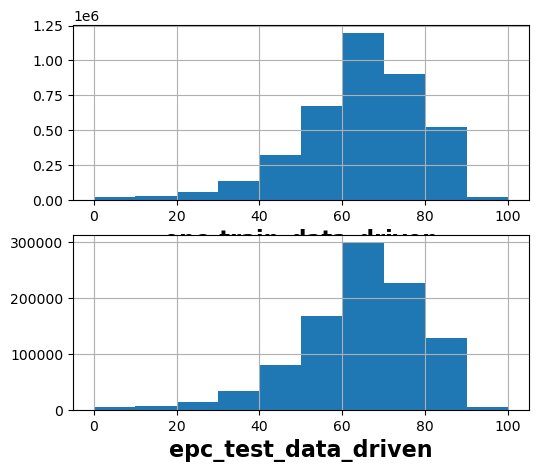

In [7]:
# plot distribution for each feature set
plt.figure(figsize=(20,5))

plt.subplot(233)
epc_train['CURRENT_ENERGY_EFFICIENCY'].hist()
plt.xlabel('epc_train_data_driven',fontsize=16, weight='bold')

plt.subplot(236)
epc_test['CURRENT_ENERGY_EFFICIENCY'].hist()
plt.xlabel('epc_test_data_driven',fontsize=16, weight='bold')

### one hot encode categorical values

In [8]:
epc_train.columns

Index(['CURRENT_ENERGY_EFFICIENCY', 'TOTAL_FLOOR_AREA', 'MAINS_GAS_FLAG',
       'HEAT_LOSS_CORRIDOR', 'built_form', 'energy_tariff',
       'floor_description', 'floor_level', 'glazed_type',
       'hotwater_description', 'lighting_description', 'mainheat_controls',
       'property_type', 'roof_description', 'transaction_type',
       'walls_description', 'window_description', 'locality', 'extension',
       'floor_height', 'habitable_rooms', 'open_fireplaces'],
      dtype='object')

In [ ]:
# for col in ['MAINS_GAS_FLAG','HEAT_LOSS_CORRIDOR','built_form','energy_tariff','floor_description','floor_level',
#             'glazed_type','hotwater_description','lighting_description','mainheat_controls','property_type',
#             'roof_description','transaction_type','walls_description','window_description','locality','extension',
#             'floor_height','habitable_rooms','open_fireplaces']:
#     print(col)
#     for_dummy = epc_train.pop(col)
#     epc_train = pd.concat([epc_train, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [ ]:
# for col in ['MAINS_GAS_FLAG','HEAT_LOSS_CORRIDOR','built_form','energy_tariff','floor_description','floor_level',
#             'glazed_type','hotwater_description','lighting_description','mainheat_controls','property_type',
#             'roof_description','transaction_type','walls_description','window_description','locality','extension',
#             'floor_height','habitable_rooms','open_fireplaces']:
#     print(col)
#     for_dummy = epc_test.pop(col)
#     epc_test = pd.concat([epc_test, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [9]:
def process_data_for_modelling(training_data,test_data):
    
    ''' 
    Prepares the data for modelling by one hot encoding the categorical features, converting discrete values into
    strings and dropping BUILDING_REFERENCE_NUMBER
    Parameters
      training_data: a dataframe of training data with columns called LODGEMENT_DATE, BUILDING_REFERENCE_NUMBER
      test_data: a dataframe of test data with columns called LODGEMENT_DATE, BUILDING_REFERENCE_NUMBER
    Returns two dataframes 
    '''
    
    training_data['mode'] = 'train'
    test_data['mode'] = 'test'
    epc = pd.concat([training_data, test_data])
    epc = epc.reset_index(drop = True)
    
    # try:
    #     epc.drop(['LODGEMENT_DATE'],axis=1,inplace=True)
    # except:
    #     pass
    
    # try:
    #     epc['extension'] = epc['extension'].astype('str')
    #     epc['habitable_rooms'] = epc['habitable_rooms'].astype('str')
    # except:
    #     pass
    
    for col in epc.dtypes[epc.dtypes == 'object'].index:
        if col not in ['mode']:
            print(col)
            for_dummy = epc.pop(col)
            epc = pd.concat([epc, pd.get_dummies(for_dummy, prefix=col)], axis=1)
        
    # features_to_drop = ['BUILDING_REFERENCE_NUMBER']
    # epc.drop(features_to_drop,axis=1,inplace=True)
    
    #Split back into train and test
    training_data = epc[epc['mode']=='train']
    test_data = epc[epc['mode']=='test']
    test_data = test_data.reset_index(drop=True)
    inputs_train = training_data.drop('mode',axis=1)
    inputs_test = test_data.drop('mode',axis=1)
    
    return inputs_train, inputs_test

In [10]:
inputs_train, inputs_test = process_data_for_modelling(epc_train, epc_test)

MAINS_GAS_FLAG
HEAT_LOSS_CORRIDOR
built_form
energy_tariff
floor_description
floor_level
glazed_type
hotwater_description
lighting_description
mainheat_controls
property_type
roof_description
transaction_type
walls_description
window_description
locality
extension
floor_height
habitable_rooms
open_fireplaces


In [11]:
inputs_train.head()

,CURRENT_ENERGY_EFFICIENCY,TOTAL_FLOOR_AREA,MAINS_GAS_FLAG_N,MAINS_GAS_FLAG_Y,HEAT_LOSS_CORRIDOR_heated corridor,HEAT_LOSS_CORRIDOR_no corridor,HEAT_LOSS_CORRIDOR_unheated corridor,built_form_Enclosed End-Terrace,built_form_Enclosed Mid-Terrace,built_form_detached,...,floor_height_2.7+,habitable_rooms_1,habitable_rooms_2,habitable_rooms_3,habitable_rooms_4,habitable_rooms_5,habitable_rooms_6+,open_fireplaces_0,open_fireplaces_1,open_fireplaces_2+
0,69,129.0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
1,61,66.0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,29,290.0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
3,55,130.0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
4,77,99.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [12]:
inputs_test.head()

,CURRENT_ENERGY_EFFICIENCY,TOTAL_FLOOR_AREA,MAINS_GAS_FLAG_N,MAINS_GAS_FLAG_Y,HEAT_LOSS_CORRIDOR_heated corridor,HEAT_LOSS_CORRIDOR_no corridor,HEAT_LOSS_CORRIDOR_unheated corridor,built_form_Enclosed End-Terrace,built_form_Enclosed Mid-Terrace,built_form_detached,...,floor_height_2.7+,habitable_rooms_1,habitable_rooms_2,habitable_rooms_3,habitable_rooms_4,habitable_rooms_5,habitable_rooms_6+,open_fireplaces_0,open_fireplaces_1,open_fireplaces_2+
0,71,73.00,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,65,53.00,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,81,122.00,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,57,78.87,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,64,81.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
# inputs_train, inputs_test = process_data_for_modelling(epc_train, epc_test)

In [13]:
#Extract the target and features
target_train = inputs_train['CURRENT_ENERGY_EFFICIENCY']
inputs_train = inputs_train.drop('CURRENT_ENERGY_EFFICIENCY',axis=1)
target_test = inputs_test['CURRENT_ENERGY_EFFICIENCY']
inputs_test = inputs_test.drop('CURRENT_ENERGY_EFFICIENCY',axis=1)

### scale numeric values 

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [15]:
def scale_numeric(df,col):
    
    ''' 
    Fits a scaler called scaler to the specified column
    Parameters
      df: a dataframe
      col: numeric variable to scale
    Returns a dataframe
    '''
    
    null_index = df[col].isnull()
    df.loc[~null_index, [col]] = scaler.fit_transform(df.loc[~null_index, [col]])
    
    return df

In [16]:
inputs_train = scale_numeric(inputs_train,'TOTAL_FLOOR_AREA')
inputs_test = scale_numeric(inputs_test,'TOTAL_FLOOR_AREA')
# try:
#     inputs_train = scale_numeric(inputs_train,'floor_height')
#     inputs_test = scale_numeric(inputs_test,'floor_height')
# except:
#     pass
# try:
#     inputs_train = scale_numeric(inputs_train,'habitable_rooms')
#     inputs_test = scale_numeric(inputs_test,'habitable_rooms')
# except:
#     pass

### fill missing values

In [17]:
numeric_cols = inputs_train.dtypes[inputs_train.dtypes == 'float'].index

In [18]:
inputs_train[numeric_cols].isnull().sum().sort_values(ascending = False) / inputs_train.shape[0]

TOTAL_FLOOR_AREA    0.0
dtype: float64

In [19]:
inputs_test.head()

,TOTAL_FLOOR_AREA,MAINS_GAS_FLAG_N,MAINS_GAS_FLAG_Y,HEAT_LOSS_CORRIDOR_heated corridor,HEAT_LOSS_CORRIDOR_no corridor,HEAT_LOSS_CORRIDOR_unheated corridor,built_form_Enclosed End-Terrace,built_form_Enclosed Mid-Terrace,built_form_detached,built_form_terraced,...,floor_height_2.7+,habitable_rooms_1,habitable_rooms_2,habitable_rooms_3,habitable_rooms_4,habitable_rooms_5,habitable_rooms_6+,open_fireplaces_0,open_fireplaces_1,open_fireplaces_2+
0,0.251724,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,0.182759,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,0.420690,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.271966,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,0.279310,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
inputs_train['floor_height'] = inputs_train['floor_height'].fillna(inputs_train['floor_height'].mean())
inputs_train['habitable_rooms'] = inputs_train['habitable_rooms'].fillna(inputs_train['habitable_rooms'].mean())
inputs_test['floor_height'] = inputs_test['floor_height'].fillna(inputs_test['floor_height'].mean())
inputs_test['habitable_rooms'] = inputs_test['habitable_rooms'].fillna(inputs_test['habitable_rooms'].mean())

In [ ]:
inputs_train = inputs_train.drop('HEAT_LOSS_CORRIDOR',axis=1)
inputs_test = inputs_test.drop('HEAT_LOSS_CORRIDOR',axis=1)

In [17]:
# epc_train[['TOTAL_FLOOR_AREA']].isnull().sum().sort_values(ascending = False) / epc_train.shape[0]

TOTAL_FLOOR_AREA    0.0
dtype: float64

### Create input dataframes

In [19]:
inputs_train.head()

,TOTAL_FLOOR_AREA,MAINS_GAS_FLAG_N,MAINS_GAS_FLAG_Y,HEAT_LOSS_CORRIDOR_heated corridor,HEAT_LOSS_CORRIDOR_no corridor,HEAT_LOSS_CORRIDOR_unheated corridor,built_form_Enclosed End-Terrace,built_form_Enclosed Mid-Terrace,built_form_detached,built_form_terraced,...,habitable_rooms_1,habitable_rooms_2,habitable_rooms_3,habitable_rooms_4,habitable_rooms_5,habitable_rooms_6+,habitable_rooms_nan,open_fireplaces_0,open_fireplaces_1,open_fireplaces_2+
0,0.444828,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0.227586,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,1.000000,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,0.448276,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0.341379,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


### Train the model

In [20]:
seed(5)

#Instantiate network and early stopping monitor (stop training if
#validation error doesnt drop for 2 successive epochs)
deep_model = Sequential()
deep_model_monitor = EarlyStopping(patience = 2)

#Specify architecture
n_inputs = inputs_train.shape[1]

deep_model.add(Dense(120,activation = 'relu', input_shape = (n_inputs,)))
deep_model.add(Dense(60,activation = 'relu'))
deep_model.add(Dense(10,activation = 'relu'))
deep_model.add(Dense(4,activation = 'relu'))
deep_model.add(Dense(1,activation = 'relu'))

#Get the total number of tunable parameters)
print("Total network parameters:  %i" % deep_model.count_params())

deep_model.compile(optimizer = 'adam',loss = 'mean_squared_error')

#Train the model
deep_model.fit(inputs_train,target_train, epochs = 999,
               validation_split = 0.1, callbacks = [deep_model_monitor])

Total network parameters:  42119
Epoch 1/999
108765/108765 [==============================] - 442s 4ms/step - loss: 61.0644 - val_loss: 57.2009
Epoch 2/999
108765/108765 [==============================] - 399s 4ms/step - loss: 56.8051 - val_loss: 56.1547
Epoch 3/999
108765/108765 [==============================] - 367s 3ms/step - loss: 56.0763 - val_loss: 55.7912
Epoch 4/999
108765/108765 [==============================] - 384s 4ms/step - loss: 55.6200 - val_loss: 55.4304
Epoch 5/999
108765/108765 [==============================] - 382s 4ms/step - loss: 55.2877 - val_loss: 55.5008
Epoch 6/999
108765/108765 [==============================] - 351s 3ms/step - loss: 55.0609 - val_loss: 55.7134


In [21]:
#Get performance on training and test data
predict_train = deep_model.predict(inputs_train)
predict_test = deep_model.predict(inputs_test)
train_r_squared = r2_score(target_train,predict_train)
test_r_squared = r2_score(target_test,predict_test)
train_mse = mean_squared_error(target_train,predict_train)
test_mse = mean_squared_error(target_test,predict_test)
r2_delta = abs(train_r_squared - test_r_squared)
print('\tVariance scores:\t%.4f\t%.4f' % (train_r_squared,test_r_squared))
print('\tMean squared error:\t%.4f\t%.4f' % (train_mse, test_mse))
print("\tR2 delta\t\t%f" % r2_delta)

30213/30213 [==============================] - 72s 2ms/step
	Variance scores:	0.7401	0.7359
	Mean squared error:	55.0322	55.9651
	R2 delta		0.004137


## Results by band

predict_test_series = pd.Series(predict_test)
test_scored = pd.DataFrame(target_test)
test_scored = test_scored.reset_index(drop=True)
test_scored['predicted_score'] = predict_test_series

In [23]:
# predict_test_series = pd.Series(predict_test)
test_scored = pd.DataFrame(target_test)
test_scored = test_scored.reset_index(drop=True)
test_scored['predicted_score'] = predict_test

In [24]:
band_bins = [-1,0,20,38,54,68,80,91,100]
band_labels = ['I','G','F','E','D','C','B','A']
test_scored['predicted_band'] = pd.cut(test_scored['predicted_score'],bins = band_bins, labels = band_labels)
test_scored['actual_band'] = pd.cut(test_scored['CURRENT_ENERGY_EFFICIENCY'],bins = band_bins, labels = band_labels)

In [25]:
# average accuracy per band
(test_scored['actual_band'] == test_scored['predicted_band']).sum()/len(test_scored)

0.6596486546310605

In [26]:
# accuracy for each band
test_scored['correct_band'] = test_scored['actual_band'] == test_scored['predicted_band']
test_scored.groupby('actual_band')['correct_band'].sum()/test_scored.groupby('actual_band')['correct_band'].count()

actual_band
I    0.000000
G    0.206139
F    0.323197
E    0.499601
D    0.712504
C    0.678204
B    0.838853
A    0.008578
Name: correct_band, dtype: float64

In [27]:
# manipulating data for heatmap
for_heatmap = test_scored[['actual_band','predicted_band']]
for_dummy = for_heatmap.pop('actual_band')
for_heatmap = pd.concat([for_heatmap, pd.get_dummies(for_dummy)], axis=1)
for_heatmap_summed = for_heatmap.groupby('predicted_band')['A','B','C','D','E','F','G'].sum()

C:\Users\KingRemy\AppData\Local\Temp\ipykernel_14080\3882052621.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  for_heatmap_summed = for_heatmap.groupby('predicted_band')['A','B','C','D','E','F','G'].sum()


In [28]:
def get_pct(x):
    return (x/(x.sum()))*100

In [29]:
for_heatmap_summed = for_heatmap_summed.apply(get_pct,axis = 0)

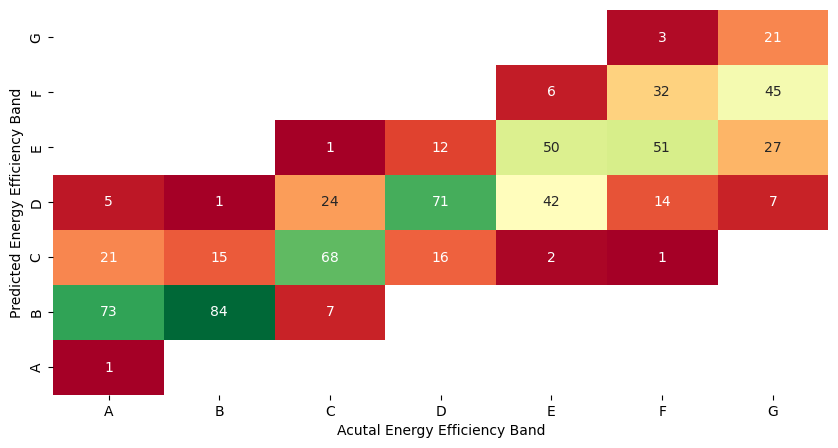

In [30]:
heatmap_test = round(for_heatmap_summed,0)
heatmap_test = heatmap_test.replace(0,np.nan)
heatmap_test = heatmap_test.loc[['G','F','E','D','C','B','A'],:]

f = plt.figure(figsize=(10,5))
sns.heatmap(heatmap_test, cmap='RdYlGn',annot=True,cbar=False)
plt.xlabel('Acutal Energy Efficiency Band')
plt.ylabel('Predicted Energy Efficiency Band')
plt.show()